In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [2]:
df=pd.read_csv('/content/data_for_lr.csv')

In [3]:
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [5]:
df=df.dropna(axis=0)

In [6]:
df.shape

(699, 2)

In [7]:
x_train=np.array(df.x[0:500]).reshape(500,1)
y_train=np.array(df.y[0:500]).reshape(500,1)

x_test=np.array(df.x[500:]).reshape(199,1)
y_test=np.array(df.y[500:]).reshape(199,1)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_regressor=PolynomialFeatures(degree=2)

In [11]:
train_input_poly=poly_regressor.fit_transform(x_train)
poly_regressor.fit(x_train,y_train)

PolynomialFeatures()

In [12]:
train_input_poly.shape

(500, 3)

In [13]:
train_input_poly

array([[1.000e+00, 2.400e+01, 5.760e+02],
       [1.000e+00, 5.000e+01, 2.500e+03],
       [1.000e+00, 1.500e+01, 2.250e+02],
       ...,
       [1.000e+00, 2.100e+01, 4.410e+02],
       [1.000e+00, 8.100e+01, 6.561e+03],
       [1.000e+00, 9.700e+01, 9.409e+03]])

In [15]:
linear_regressor=LinearRegression()

In [16]:
linear_regressor.fit(train_input_poly,y_train)

LinearRegression()

In [18]:
train_output_poly=poly_regressor.fit_transform(x_test)
predictions=linear_regressor.predict(train_output_poly)

In [19]:
from sklearn.metrics import mean_squared_error as mse

In [20]:
error=mse(y_test,predictions)

In [21]:
error

8.063337564451201

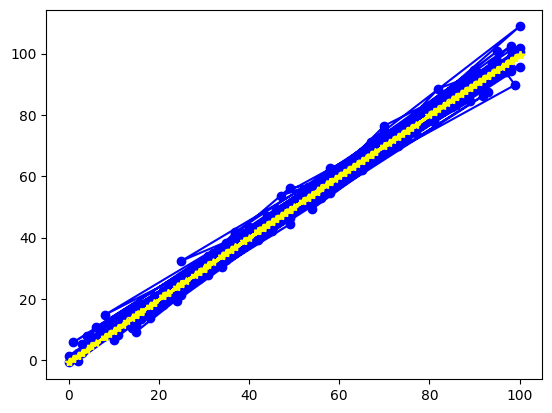

In [22]:
plt.plot(x_test,y_test,marker='o',color='blue')
plt.plot(x_test,predictions,marker='*',color='yellow')
plt.show()